# Targeting with Partial Incentives - Reti Sociali 2019/2020
Graziuso Catello, Marzullo Francesco, Scavone FrancescaGraziuso Catello, Marzullo Francesco, Scavone Francesca

## Introduzione
Lo spreading attraverso la rete riflette la situazione in cui i comportamenti si trasmettono a cascata da un nodo ad un altro come una epidemia. È un processo per il quale un pezzo di informazione viene diffuso e raggiunge gli individui attraverso le interazioni che esistono tra di loro. Questo processo viene definito formalmente come **Network Cascade**. Esso si occupa del contagio che si diffonde lungo gli archi della rete. I modelli per il Network Cascade permettono di comprendere la diffusione, all'interno di una rete, di informazioni/epidemie. L'obiettivo è cercare di capire cosa può causare e come può avvenire la massimizzazione all'interno della rete, ovvero di selezionare un seed set di taglia minima iniziale così da garantire l'influenza del maggior numero di nodi all'interno della rete. Questo lavoro è stato effettuato da Kempe e Kleinberg nel 2003.Lo spreading attraverso la rete riflette la situazione in cui i comportamenti si trasmettono a cascata da un nodo ad un altro come una epidemia. È un processo per il quale un pezzo di informazione viene diffuso e raggiunge gli individui attraverso le interazioni che esistono tra di loro. Questo processo viene definito formalmente come **Network Cascade**. Esso si occupa del contagio che si diffonde lungo gli archi della rete. I modelli per il Network Cascade permettono di comprendere la diffusione, all'interno di una rete, di informazioni/epidemie. L'obiettivo è cercare di capire cosa può causare e come può avvenire la massimizzazione all'interno della rete, ovvero di selezionare un seed set di taglia minima iniziale così da garantire l'influenza del maggior numero di nodi all'interno della rete. Questo lavoro è stato effettuato da Kempe e Kleinberg nel 2003.

In questo contesto risulta fondamentale l'identificazione di quei clienti con una maggiore influenza sul mercato per attirare un gran numero di acquirenti. Essi risulterebbero utili a convincere tutti gli altri nodi all'interno della rete, come gli influencer su Instagram. Quindi tramite incentivi, si può convincere un insieme di persone influenti che possono consigliare un prodotto per contribuire alla sua diffusione.In questo contesto risulta fondamentale l'identificazione di quei clienti con una maggiore influenza sul mercato per attirare un gran numero di acquirenti. Essi risulterebbero utili a convincere tutti gli altri nodi all'interno della rete, come gli influencer su Instagram. Quindi tramite incentivi, si può convincere un insieme di persone influenti che possono consigliare un prodotto per contribuire alla sua diffusione.

Uno degli algoritmi pensato a tale scopo è il **Targeting with Partial Incentives (TPI)**Uno degli algoritmi pensato a tale scopo è il **Targeting with Partial Incentives (TPI)**.

## Descrizione dell'algoritmo
L'algoritmo TPI rappresenta una evoluzione dell'algoritmo di Target Set Selection, la cui idea alla base prevede l'assegnazione di incentivi ai nodi.  
Un'assegnazione di incentivi parziali ai vertici di una rete G=(V, E) con V={v<sub>1</sub>, ..., v<sub>n</sub>} è un vettore S= (s(v<sub>1</sub>), ..., s(v<sub>n</sub>)), dove s(v)∈{0,1,2, ...} rappresenta la quantità di influenza che inizialmente applichiamo su v∈V. 
Formalmente è definito come segue:
- Istanza, una rete G= (V, E) con una funzione di soglie t:V→N
- Problema, trovare un target vectorsche minimizza C(S) = Σ<sub>v∈V</sub> s(v)

L'algoritmo  utilizzato  per  il  calcolo  degli  incentivi  è  riportato  di  seguito,  descritto  nell'articolo "Whom to be friend to influence people."
<img src="https://i.ibb.co/0fQfQqj/unknown.png" border="0">

# Implementazione

## Dataset
I Dataset scelti per effettuare il testing sono i seguenti:
- ego-Facebook, reperibile al seguente link:  https://snap.stanford.edu/data/ego-Facebook.html
- ego-Twitter, reperibile al seguente link:  https://snap.stanford.edu/data/ego-Twitter.html 
- musae_twitch(PTBR), reperibile al seguente link: https://snap.stanford.edu/data/twitch-social-networks.html
- p2p_Gnutella04, reperibile al seguente link: https://snap.stanford.edu/data/p2p-Gnutella04.html


| Datasets                   | Numero di nodi | Numero di archi | Grado Massimo | Coefficiente di Clustering |
|----------------------------|----------------|-----------------|---------------|----------------------------|
| ego-facebook               | 4039           | 88234           | 1045          | 0.6055                     |
| ego-twitter                | 81306          | 1342310         | 3383          | 0.5653                     |
| musae_twitch(PTBR)         | 1912           | 31299           | 767           | 0.3199                     |
| p2p_Gnutella04             | 10876          | 39994           | 103           | 0.0062                     |
| rnd_graph_1                | 4000           | 89000           | 74            | 0.0110                     |
| rnd_graph_2                | 2000           | 32000           | 49            | 0.0164                     |
| rnd_graph_3                | 10996          | 40000           | 21            | 0.0006                     |


## Struttura del progetto
In fase preliminare, selezionato un grafo non direzionato G=(V,E) è stato applicato il principio di decisione differita: per ogni arco del grafo è stato generato un numero pseudocasuale compreso tra 0 e 1. Se il numero generato risultava minore della probabilità presente sull'arco, l'arco veniva rimosso. 
Il grafo così ottenuto è stato dato in input all'algoritmo TPI, che calcola l'insieme soluzione e restituisce in output il numero di incentivi totali forniti. Questa ultima procedura viene iterata per un numero ben definito di volte e viene poi calcolata la media delle soluzioni fornite. In fase preliminare, selezionato un grafo non direzionato G=(V,E) è stato applicato il principio di decisione differita: per ogni arco del grafo è stato generato un numero pseudocasuale compreso tra 0 e 1. Se il numero generato risultava minore della probabilità presente sull'arco, l'arco veniva rimosso. 
Il grafo così ottenuto è stato dato in input all'algoritmo TPI, che calcola l'insieme soluzione e restituisce in output il numero di incentivi totali forniti. Questa ultima procedura viene iterata per un numero ben definito di volte e viene poi calcolata la media delle soluzioni fornite.

### Librerie utilizzare
Per la gestione dei grafi è stata utilizzata la libreria Stanford Network Analysis Platform (```SNAP```) con l'aggiunta di altre librerie varie per la gestione delle operazioni matematiche e ottimizzazione del codice (```math```,```random```,```numpy```). Per la fase di testing e la generazione dei grafici relativi ai risultati ottenuti è stata utilizzata la libreria Per la fase di testing e la generazione dei grafici relativi ai risultati ottenuti è stata utilizzata la libreria ```matplotlib.pyplot```, con l'aggiunta di ```pandas``` per la gestione dei file.
Dovendo generare grafi randomici, della tipologia Erdős-Rényi, è stata sfruttata la libreria ```networkX```.

In [1]:
import snap
import random
from statistics import median
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plots
import tpi_algorithm
import graph_setup
from networkx import nx

### Metodi sviluppati
I metodi sviluppati per l'eliminazione degli archi sono i seguenti:

**Probabilità randomica**: il coefficiente di probabilità di un arco e il coefficiente per la decisione differita sono stati entrambi generati in modo causale con un valore compreso tra 0 e 1, con una approsimazione di cinque cifre decimali.

In [2]:
def edge_random_probability(graph):
    print("Number of starting edges: ", graph.GetEdges())
    for n in graph.Nodes():
        remove_edge = []
        for e in n.GetOutEdges():
            random_edge_value = round(random.uniform(0.1, 1), 5)
            random_del_value = round(random.uniform(0.1, 1), 5)
            if random_edge_value >= random_del_value:
                remove_edge.append(e)
        for dest in remove_edge:
            graph.DelEdge(n.GetId(), dest)
    print("Number of remaining edges: ", graph.GetEdges())

**Probabilità proporzionale al grado**: il coefficiente di probabilità di un arco è stato definito come il rapporto 1/|V| e il coefficiente per la decisione differita è stato generato in modo causale con un valore compreso tra 0 e 1, con una approssimazione di cinque cifre decimali.

In [3]:
def edge_proportional_to_degree_probability(graph):
    print("Number of starting edges: ", graph.GetEdges())
    for n in graph.Nodes():
        remove_edge = []
        for e in n.GetOutEdges():
            random_edge_value = (1/n.GetDeg())
            random_del_value = random.random()
            if random_edge_value >= random_del_value:
                remove_edge.append(e)
        for dest in remove_edge:
            graph.DelEdge(n.GetId(), dest)
    print("Number of remaining edges: ", graph.GetEdges())

I metodi sviluppati per l'assegnazione dei valori di threshold per ogni nodo sono descritti di seguito. Per poter assegnare il threshold ai nodi, il grafo è stato convertito in un formato ```PNEANet``` tramite la funzione fornita dalla libreria snap ```ConvertGraph``` che permette di inserire un attributo (intero) ai vertici.
   
**Assegnazione randomica**: il threshold per ogni nodo è stato assegnato in modo casuale all'interno di un intervallo che va da 0 ad un valore di poco superiore grado del nodo.

In [4]:
def set_random_threshold(graph):
    g = snap.ConvertGraph(snap.PNEANet, graph)
    for n in g.Nodes():
        max= n.GetDeg() + int((n.GetDeg()/100)*20+1)
        random_value = random.randint(0, max)
        g.AddIntAttrDatN(n.GetId(), random_value, "threshold")
        #print("Threshold of the node ", n.GetId()," with value", g.GetIntAttrDatN(n.GetId(),"threshold"))
    return gdef set_random_threshold(graph):
    g = snap.ConvertGraph(snap.PNEANet, graph)
    for n in g.Nodes():
        max= n.GetDeg() + int((n.GetDeg()/100)*20+1)
        random_value = random.randint(0, max)
        g.AddIntAttrDatN(n.GetId(), random_value, "threshold")
        #print("Threshold of the node ", n.GetId()," with value", g.GetIntAttrDatN(n.GetId(),"threshold"))
    return g

SyntaxError: invalid syntax (<ipython-input-4-d05999cb3536>, line 8)

**Assegnazione costante:** il threshold per ogni nodo viene passato in input dall'utente ed è costante per ogni nodo.Assegnazione costante: il threshold per ogni nodo viene passato in input dall'utente ed è costante per ogni nodo.

In [5]:
def set_fixed_threshold(graph, value):
    g = snap.ConvertGraph(snap.PNEANet, graph)
    for n in g.Nodes():
        g.AddIntAttrDatN(n.GetId(), value, "threshold")
    return gdef set_fixed_threshold(graph, value):
    g = snap.ConvertGraph(snap.PNEANet, graph)
    for n in g.Nodes():
        g.AddIntAttrDatN(n.GetId(), value, "threshold")
    return g

SyntaxError: invalid syntax (<ipython-input-5-779aad177437>, line 5)

**Assegnazione in base alla mediana:** il threshold per ogni nodo viene assegnato in base al valore della mediana calcolata sulla distribuzione dei gradi di tutti i nodi.Assegnazione in base alla mediana: il threshold per ogni nodo viene assegnato in base al valore della mediana calcolata sulla distribuzione dei gradi di tutti i nodi.

In [6]:
def set_median_threshold(graph):
    g = snap.ConvertGraph(snap.PNEANet, graph)
    data=[]
    print("Number of graph nodes: ", g.GetNodes())
    count=0
    for n in g.Nodes():
        data.append(n.GetDeg())
    value = median(data)
    print("The median value is: ", value)
    for n in g.Nodes():
        g.AddIntAttrDatN(n.GetId(), value, "threshold")
        print("Threshold of the node ", n.GetId(), " with value ", g.GetIntAttrDatN(n.GetId(), "threshold"))
        if n.GetDeg()<value:
            count+=1
    print("Number of nodes below the median: ", count)
    return gdef set_median_threshold(graph):
    g = snap.ConvertGraph(snap.PNEANet, graph)
    data=[]
    print("Number of graph nodes: ", g.GetNodes())
    count=0
    for n in g.Nodes():
        data.append(n.GetDeg())
    value = median(data)
    print("The median value is: ", value)
    for n in g.Nodes():
        g.AddIntAttrDatN(n.GetId(), value, "threshold")
        print("Threshold of the node ", n.GetId(), " with value ", g.GetIntAttrDatN(n.GetId(), "threshold"))
        if n.GetDeg()<value:
            count+=1
    print("Number of nodes below the median: ", count)
    return g

SyntaxError: invalid syntax (<ipython-input-6-f81fbb006627>, line 16)

**Assegnazione proporzionale al grado:** il threshold per ogni nodo viene assegnato in relazione al loro grado. Il valore è dato dal prodotto del grado per un valore ben definito, passato in input, in un intervallo che va da 0.1 a 0.9, a cui viene sommato il valore 1.Assegnazione proporzionale al grado: il threshold per ogni nodo viene assegnato in relazione al loro grado. Il valore è dato dal prodotto del grado per un valore ben definito, passato in input, in un intervallo che va da 0.1 a 0.9, a cui viene sommato il valore 1.

In [7]:
def set_degree_proportional_thresholds(graph, value):
    g = snap.ConvertGraph(snap.PNEANet, graph)
    print("Number of graph nodes: ", g.GetNodes())
    for n in g.Nodes():
        g.AddIntAttrDatN(n.GetId(), math.floor(n.GetDeg() * value) + 1, "threshold")
    return gdef set_degree_proportional_thresholds(graph, value):
    g = snap.ConvertGraph(snap.PNEANet, graph)
    print("Number of graph nodes: ", g.GetNodes())
    for n in g.Nodes():
        g.AddIntAttrDatN(n.GetId(), math.floor(n.GetDeg() * value) + 1, "threshold")
    return g

SyntaxError: invalid syntax (<ipython-input-7-9b1ddf0a15c6>, line 6)

## Implementazione algoritmo TPI in Python

In [8]:
def tpi(graph):
    count = 0
    count_2 = 0
    count_3 = 0
    nodes = []              #U

    for n in graph.Nodes():
        nodes.append(n.GetId())

    incentives = {}         #s(v)
    degrees = {}            #delta(v)
    thresholds = {}         #k(v)
    neighbors = {}          #N(v)
    for v in graph.Nodes():
        incentives[v.GetId()] = 0
        degrees[v.GetId()] = v.GetOutDeg()
        thresholds[v.GetId()] = graph.GetIntAttrDatN(v.GetId(), "threshold")
        temp_neigh = []
        for Id in v.GetOutEdges():
            temp_neigh.append(Id)
        neighbors[v.GetId()] = temp_neigh
    for v in nodes:
        if not nodes:
            break
        if thresholds.get(v) > degrees.get(v):
            incentives[v] = incentives[v] + thresholds[v] - degrees[v]
            count_3 += incentives[v]
            count_2 += 1
            thresholds[v] = degrees[v]
            if thresholds[v] == 0:
                nodes.remove(v)
        else:
            count += 1
            local_max = {}
            for u in nodes:
                if degrees[u] != 0:
                    local_max[u] = (thresholds[u]*(thresholds[u]+1))/(degrees[u]*(degrees[u]+1))
            node = max(local_max, key=local_max.get)

            if neighbors[node] is not None:
                for u in neighbors[node]:
                    degrees[u] -= 1
                    if neighbors[u] is not None:
                        neighbors[u] = neighbors[u].remove(node)
                nodes.remove(node)

    print("Number of total incentives: ", count_2, " with total value ocount_3, " and number of remaining nodes: ", count)
    return count_3

SyntaxError: invalid syntax (<ipython-input-8-f5e0358d16b7>, line 47)

## Testing
I test sono stati effettuati andando a combinare diversi metodi di generazione della probabilità e del threshold (random, fixed e proportional to degree). Ogni caso di test è stato ripetuto 50 volte il cui risultato era una media degli incentivi totali forniti dall'algoritmo. test sono stati effettuati andando a combinare diversi metodi di generazione della probabilità e del threshold (random, fixed e proportional to degree). Ogni caso di test è stato ripetuto 50 volte il cui risultato era una media degli incentivi totali forniti dall'algoritmo.

### Test case 1: Random probability/Random threshold
Il primo caso di test vede la generazione in modo casuale di entrambi i valori.

In [9]:
def random_random_test(dataset, path):
    avg = 0
    file_name = "Tests/" + dataset + "_tests/test_rr.csv"
    open(file_name, 'w+').write("Iteration Incentives\n")
    iterations = 50

    for j in range(0, iterations):
        graph = graph_setup.create_graph(path)
        graph_setup.edge_random_probability(graph)
        g = graph_setup.set_random_threshold(graph)
        tot_incentives = tpi_algorithm.tpi(g)
        avg += tot_incentives
        open(file_name, 'a+').write("%d %d\n" % (j + 1, tot_incentives))

    open(file_name, 'a+').write("Media %d\n" % (avg / iterations))def random_random_test(dataset, path):
    avg = 0
    file_name = "Tests/" + dataset + "_tests/test_rr.csv"
    open(file_name, 'w+').write("Iteration Incentives\n")
    iterations = 50

    for j in range(0, iterations):
        graph = graph_setup.create_graph(path)
        graph_setup.edge_random_probability(graph)
        g = graph_setup.set_random_threshold(graph)
        tot_incentives = tpi_algorithm.tpi(g)
        avg += tot_incentives
        open(file_name, 'a+').write("%d %d\n" % (j + 1, tot_incentives))

    open(file_name, 'a+').write("Media %d\n" % (avg / iterations))

SyntaxError: invalid syntax (<ipython-input-9-d4859630b3fd>, line 15)

In [10]:
plots.create_graph('rf', 10, 'Random probability - Random Threshold')

FileNotFoundError: [Errno 2] File Tests/musae_PTBR_tests/test_rf.csv does not exist: 'Tests/musae_PTBR_tests/test_rf.csv'

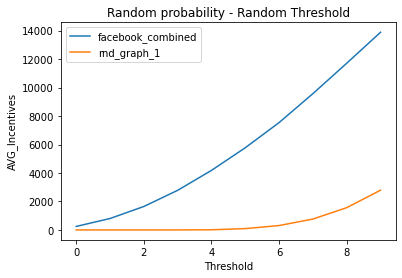

In [11]:
plots.create_comparison_graphs('facebook_combined','rnd_graph_1', 'rf', 10, 'Random probability - Random Threshold')